# 대중교통 데이터 읽어오기 

In [14]:
import csv
import matplotlib.pyplot as plt
import platform

## 유임 승차 비율이 50% 이하인 역

['23.Dec', '1호선', '157', '제기동', 231358, 219338, 256218, 272510] 0.47
호선명: 1호선, 역이름:	제기동, 전체 인원: 487,576명,유임승차인원:	231,358명, 유임승차 비율: 47.45%
['23.Dec', '1호선', '159', '동묘앞', 144443, 150931, 146515, 148571] 0.5
['23.Dec', '경원선', '1916', '소요산', 22856, 19642, 40555, 37554] 0.36
호선명: 경원선, 역이름:	소요산, 전체 인원: 63,411명,유임승차인원:	22,856명, 유임승차 비율: 36.04%
['23.Dec', '경원선', '1919', '연천', 10626, 10601, 20838, 21191] 0.34
호선명: 경원선, 역이름:	연천, 전체 인원: 31,464명,유임승차인원:	10,626명, 유임승차 비율: 33.77%
['23.Dec', '중앙선', '1218', '원덕', 4951, 4673, 5471, 5273] 0.48

유임 승차 비율이 가장 낮은 역 : 연천
전체 인원 : 0명,  유임승차인원 : 10,626)명,  유임승차비율 :33.8%


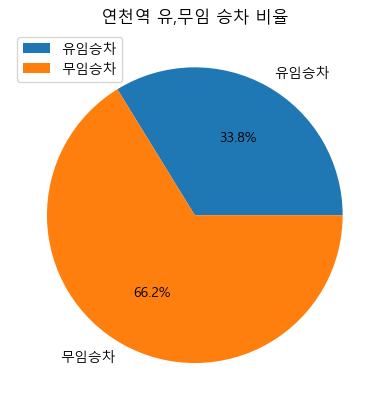

In [22]:
f=open("subwayfee.csv", encoding="utf-8-sig")
data = csv.reader(f)
header = next(data)

min_rate = 100
min_row = []
min_total_count = 0

for row in data:
    # ['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
    for i in range(4, 8):
        row[i] = int(row[i])
    total_count = row[4] + row[6]
    # 무임승차 인원이 없고, 총 승차인원이 1만명 이상
    if (row[6] != 0) and (total_count>10000):
        rate = row[4] / total_count
        if rate < 0.5:
            print(row, round(rate, 2))
            if rate < min_rate:
                min_rate = rate
                min_row = row
                min_total_num = total_count
                print(f"호선명: {min_row[1]}, 역이름:	{min_row[3]}, 전체 인원: {min_total_num:,}명," 
                f"유임승차인원:	{min_row[4]:,}명, 유임승차 비율: {round(min_rate * 100, 2):,}%")
        
f.close()
print()
print(f"유임 승차 비율이 가장 낮은 역 : {min_row[3]}")
print(f"전체 인원 : {min_total_count:,}명, ",
     f"유임승차인원 : {min_row[4]:,})명, ",
     f"유임승차비율 :{round(min_rate*100, 1)}%")

if platform.system() == "Window":
    plt.rc("font", family = "Malgun Gothic")
else:
    plt.rc("font", family = "Malgun Gothic")

plt.title(min_row[3] + "역 유,무임 승차 비율")
label = ["유임승차", "무임승차"]
values = [min_row[4], min_row[6]]
plt.pie(values, labels=label, autopct="%.1f%%")
plt.legend(loc=2)
plt.show()

## 모든 역의 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원 분석

In [42]:
max = [0] * 4
max_station = [''] * 4
label = ['유임승차',	'유임하차',	'무임승차',	'무임하차']

with open("subwayfee.csv", encoding = "utf-8-sig") as f:
    data = csv.reader(f)
    next(data)

    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i])
            if row[i] > max[i-4]:
                max[i-4] = row[i]
                max_station[i-4] = row[3]+" "+row[1]

for i in range(4):
    print(f'{label[i]}:{max_station[i]} {max[i]:,}명')


유임승차:잠실(송파구청) 2호선 2,407,622명
유임하차:잠실(송파구청) 2호선 2,389,008명
무임승차:종로3가 1호선 310,689명
무임하차:영등포 경부선 307,586명


## 전체 지하철 역 파이차트 분석

['23.Dec', '1호선', '150', '서울역', 1442704, 1404121, 211843, 203808]


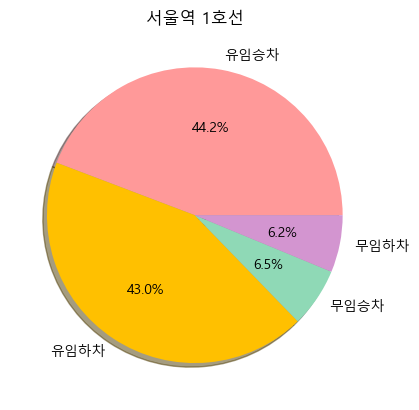

['23.Dec', '1호선', '151', '시청', 696784, 684254, 99882, 98107]


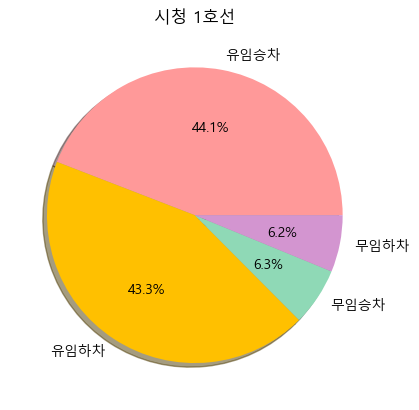

['23.Dec', '1호선', '152', '종각', 1010849, 985165, 162696, 152064]


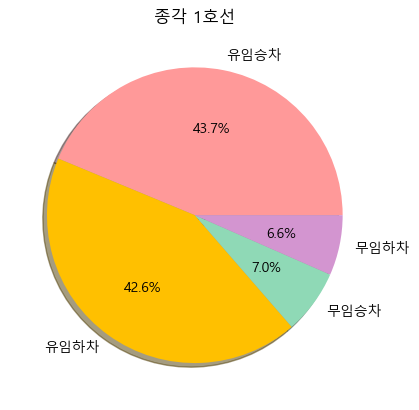

['23.Dec', '1호선', '153', '종로3가', 488467, 450427, 310689, 286850]


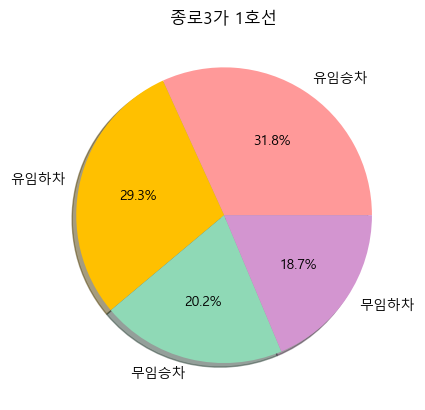

['23.Dec', '1호선', '154', '종로5가', 483866, 476917, 246504, 239266]


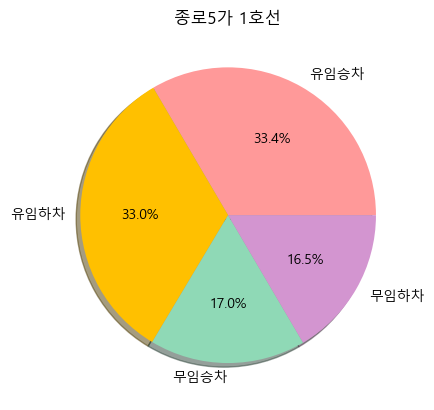

['23.Dec', '1호선', '155', '동대문', 236114, 228110, 128542, 127639]


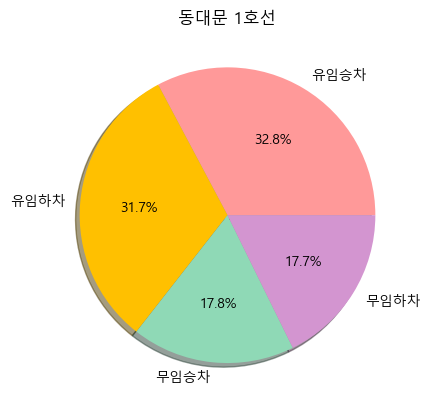

['23.Dec', '1호선', '156', '신설동', 289402, 276992, 120282, 116775]


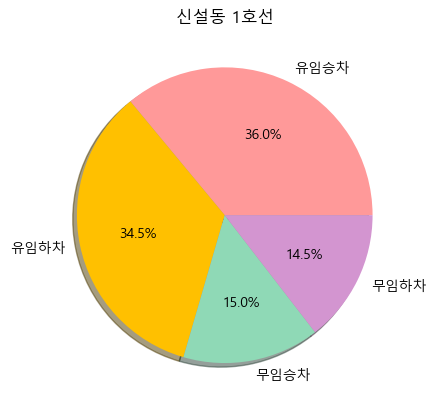

['23.Dec', '1호선', '157', '제기동', 231358, 219338, 256218, 272510]


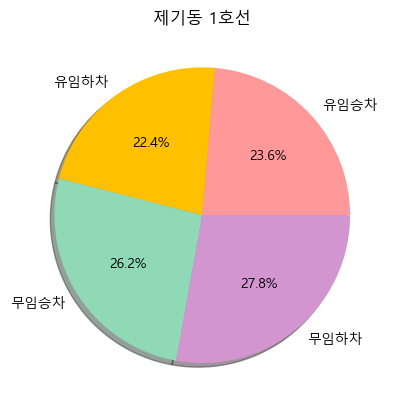

['23.Dec', '1호선', '158', '청량리(서울시립대입구)', 380606, 372443, 274847, 276209]


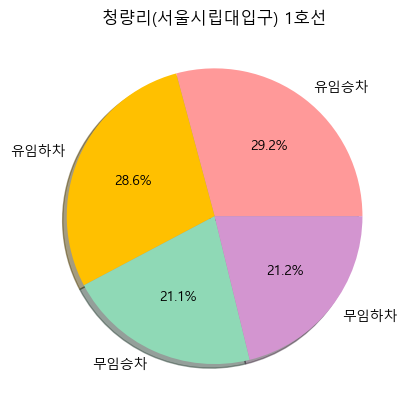

['23.Dec', '1호선', '159', '동묘앞', 144443, 150931, 146515, 148571]


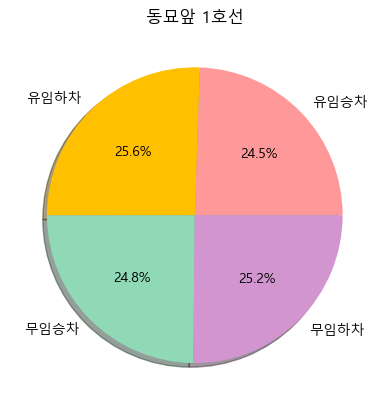

In [48]:
label = ['유임승차',	'유임하차',	'무임승차',	'무임하차']
color_list =	['#ff9999',	'#ffc000',	'#8fd9b6',	'#d395d0']	 #	파이 차트 컬러 값
pic_count =	0
with open('subwayfee.csv',	encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)

    if(platform.system() == "Windows"):
        plt.rc("font", family = "Malgun Gothic")
    else:
       plt.rc("font", family = "Malgun Gothic")

    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i])
        print(row)
        plt.figure(dpi=100)
        plt.title(row[3]+" "+row[1])

        # pie 차트 작성
        plt.pie(row[4:8], labels=label, autopct="%.1f%%", colors=color_list, shadow=True)
        plt.savefig("img/"+row[3]+" "+row[1] + ".png")
        plt.show()

        # 10개 역 파이차트만 저장 
        pic_count += 1
        if pic_count >= 10:
            break